In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\talal\Downloads\car_data.csv")
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [4]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [5]:
df.drop('User ID', axis=1, inplace=True)

In [6]:
df['Gender'] = df['Gender'].replace({'Male': 1 , 'Female': 0})
df

C:\Users\talal\AppData\Local\Temp\ipykernel_12936\1498395067.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1 , 'Female': 0})


,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


In [7]:
df['Purchased'] = df['Purchased'].astype('category')

In [8]:
X = df.drop('Purchased',axis=1)
y = df['Purchased']

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'AnnualSalary'}>, <Axes: >]], dtype=object)

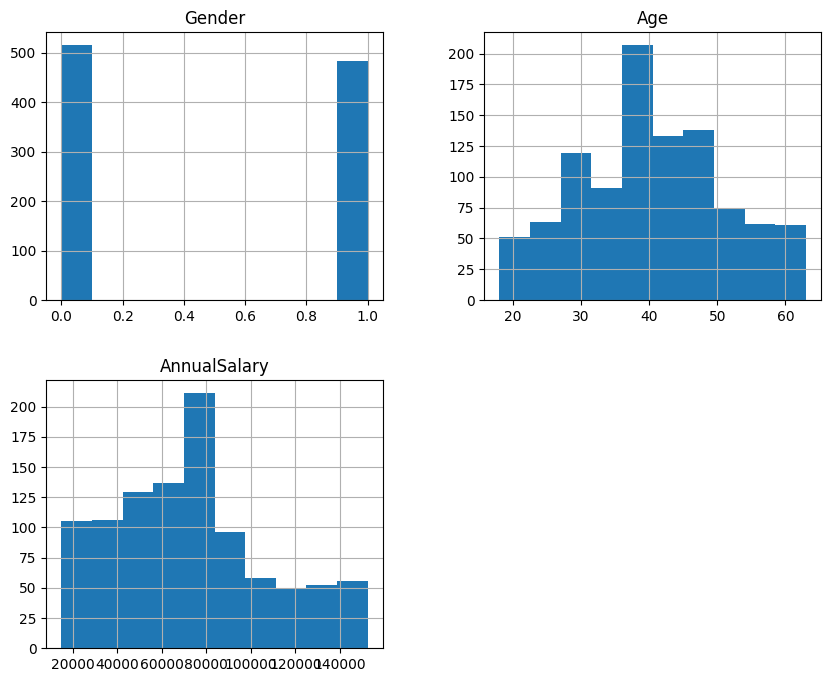

In [9]:
X.hist(figsize=(10,8))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(ccp_alpha=0.04)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.04)

In [12]:
y_pred = dt.predict(X_test)

In [13]:
print('Train Score :' , dt.score(X_train, y_train))
print('Test Score :' , dt.score(X_test, y_test))

Train Score : 0.9085714285714286
Test Score : 0.8933333333333333


In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3 , 6 , 8 , 10],
    'learning_rate': [0.01 , 0.05 , 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)

Best params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}


C:\Users\talal\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:13:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [24]:
param_grid = {
    'max_depth': [6],
    'learning_rate': [0.01],
    'n_estimators': [100],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

C:\Users\talal\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [05:18:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'learning_rate': [0.01],
                         'max_depth': [6], 'n_estimators': [100],
                         'subsample': [0.8]},
             scoring='accuracy')

In [25]:
print('Train Score :' , grid.score(X_train, y_train))
print('Test Score :' , grid.score(X_test, y_test))

Train Score : 0.9242857142857143
Test Score : 0.8933333333333333


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix, classification_report = print(confusion_matrix(y_test, y_pred)), print(classification_report(y_test, y_pred))

[[156  16]
 [ 16 112]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       172
           1       0.88      0.88      0.88       128

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [38]:
X_new = [[1,35,79000]]
y_pred2 = grid.predict(X_new)
y_pred2

array([0])